In [1]:
from train import *
from params import TrainingParams
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

from params import TransferParams
from pipeline import *
import numpy as np

Using TensorFlow backend.


In [2]:
params = TrainingParams()
# params.train_path='/home/ubuntu/work/data/unlabeled2017/*.jpg'
params.train_path='data/train/val2017/*.jpg'
params.style_path='data/starry_night.jpg'
params.batch_size = 1
params.num_epoch = 2
params.learn_rate = 0.1
params.total_train_sample = 128

In [3]:
def report_loss(batch, epoch, total_cost):
    cost_history.append(total_cost)
    plt.plot(cost_history)
    display.display(plt.gcf())
    display.clear_output(wait=True)

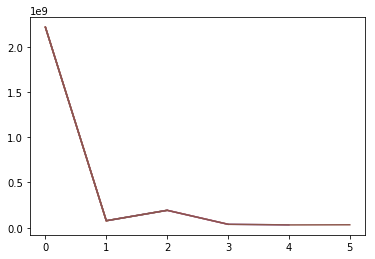

In [ ]:
cost_history = []
train(params, report_fn=report_loss, restore_epoch=None)

In [ ]:
def transfer(path, out_path=None):
    # init    
    tf.reset_default_graph()
    sess = tf.InteractiveSession()
    
    input_image = process_img(path).eval()
    input_shape = [1] + list(input_image.shape)
    
    # make the model
    input_placeholder = tf.placeholder(dtype=tf.float32, shape=input_shape, name='input_images')
    gen = SpriteGenerator(input_placeholder, 'SpriteGenerator')
    
    # restore
#     params = TransferParams()
#     saver = tf.train.Saver()
#     saver.restore(sess, params.save_path)
    
    # generate and write out
    output = sess.run(gen.output, feed_dict={input_placeholder:np.stack([input_image])})
    if out_path is not None:
        output = tf.image.encode_jpeg(output[0])  
        write = tf.write_file(out_path, output)
        sess.run(write)
        print('Generate Done.')
    else:
        plt.imshow(output[0]/255.)    

In [ ]:
transfer('data/golden_gate.jpg')